# Multiscale example in one dimension

This script will demonstrate a two dimensional example for a multiscale problem.

In [1]:
import os
import sys
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from visualize import drawCoefficient, d3sol, d3solextra

from gridlod import util, world, fem
from gridlod.world import World
import femsolverCoarse, buildcoef2d

For a two dimensional problem, we use the 'buildcoef2d' class. The constructed coefficient can be visualized with a two dimensional plot function that can be found in 'visualize'. For the reference solution we compute a solution on a fine mesh with $1/h=1024$.

<IPython.core.display.Javascript object>


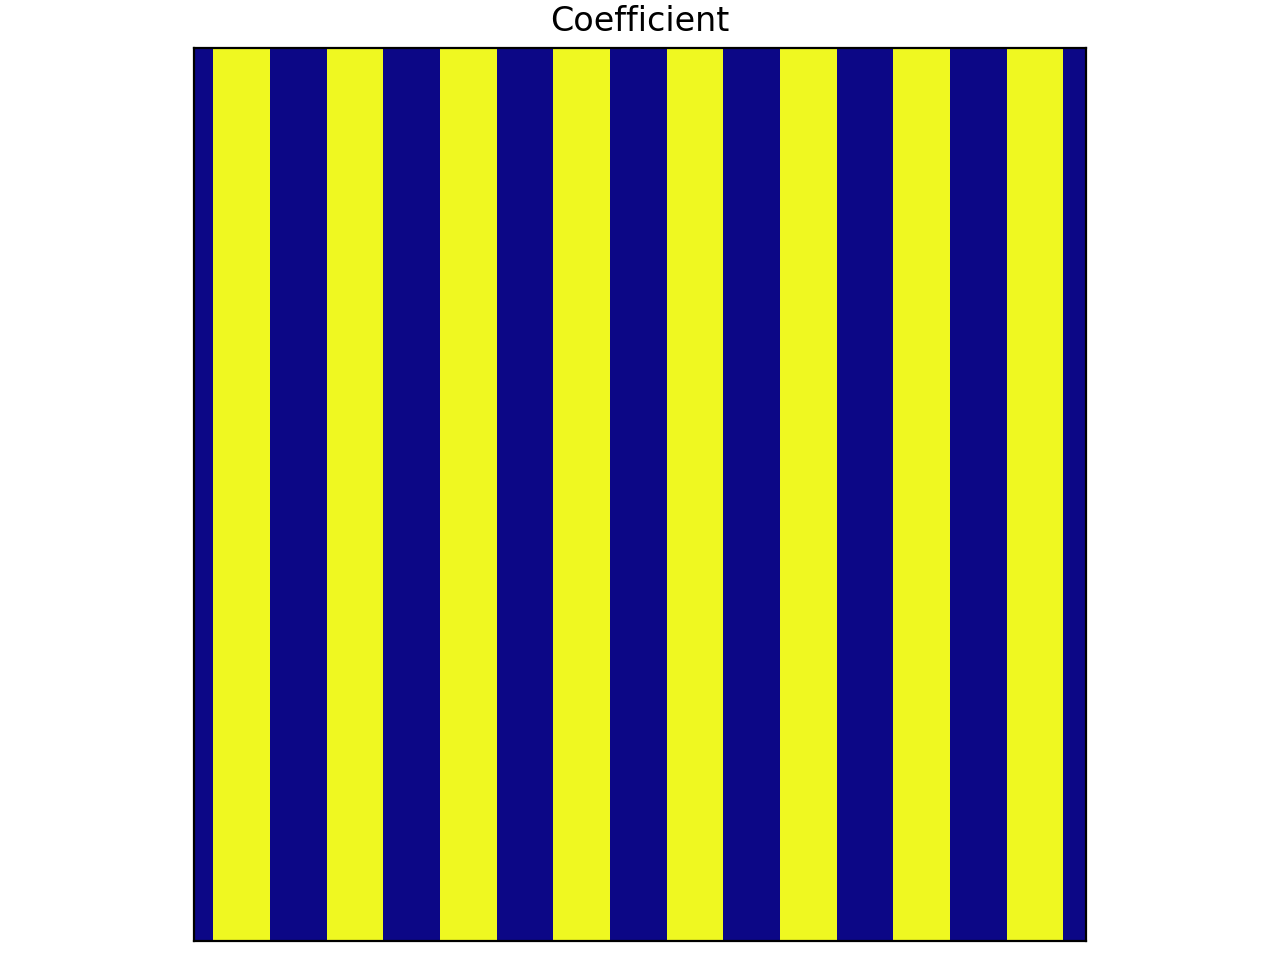

In [2]:
bg = 0.01  # background
val = 1    # values

#fine World
fine = 1024
NWorldFine = np.array([fine, fine])
NpFine = np.prod(NWorldFine+1)                                                                               
NList = [fine,2,4,8,16,32,64,128,256,512]

boundaryConditions = np.array([[0, 0],
                               [0, 0]])

#coefficient
WormsUltCoefClass = buildcoef2d.Coefficient2d(NWorldFine, 
                                            bg                  = bg, 
                                            val                 = val, 
                                            length              = 1, 
                                            thick               = 65, 
                                            space               = 65, 
                                            probfactor          = 1, 
                                            right               = 1, 
                                            down                = 0, 
                                            diagr1              = 0, 
                                            diagr2              = 0, 
                                            diagl1              = 0, 
                                            diagl2              = 0, 
                                            LenSwitch           = None, 
                                            thickSwitch         = None, 
                                            equidistant         = True, 
                                            ChannelHorizontal   = None, 
                                            ChannelVertical     = True,
                                            BoundarySpace       = None,
                                            Boxes2n             = None,
                                            Channels2n          = None,
                                            TestExample         = True)


A = WormsUltCoefClass.BuildCoefficient()
ABase = A.flatten()
plt.figure("OriginalCoefficient")
drawCoefficient(NWorldFine, ABase)
plt.title("Coefficient")
plt.show()

We compute the FEM approximation for each mesh size and display each solution for comparison. Furthermore, we store the energy error and visualize the error plot it subsequently.

<IPython.core.display.Javascript object>


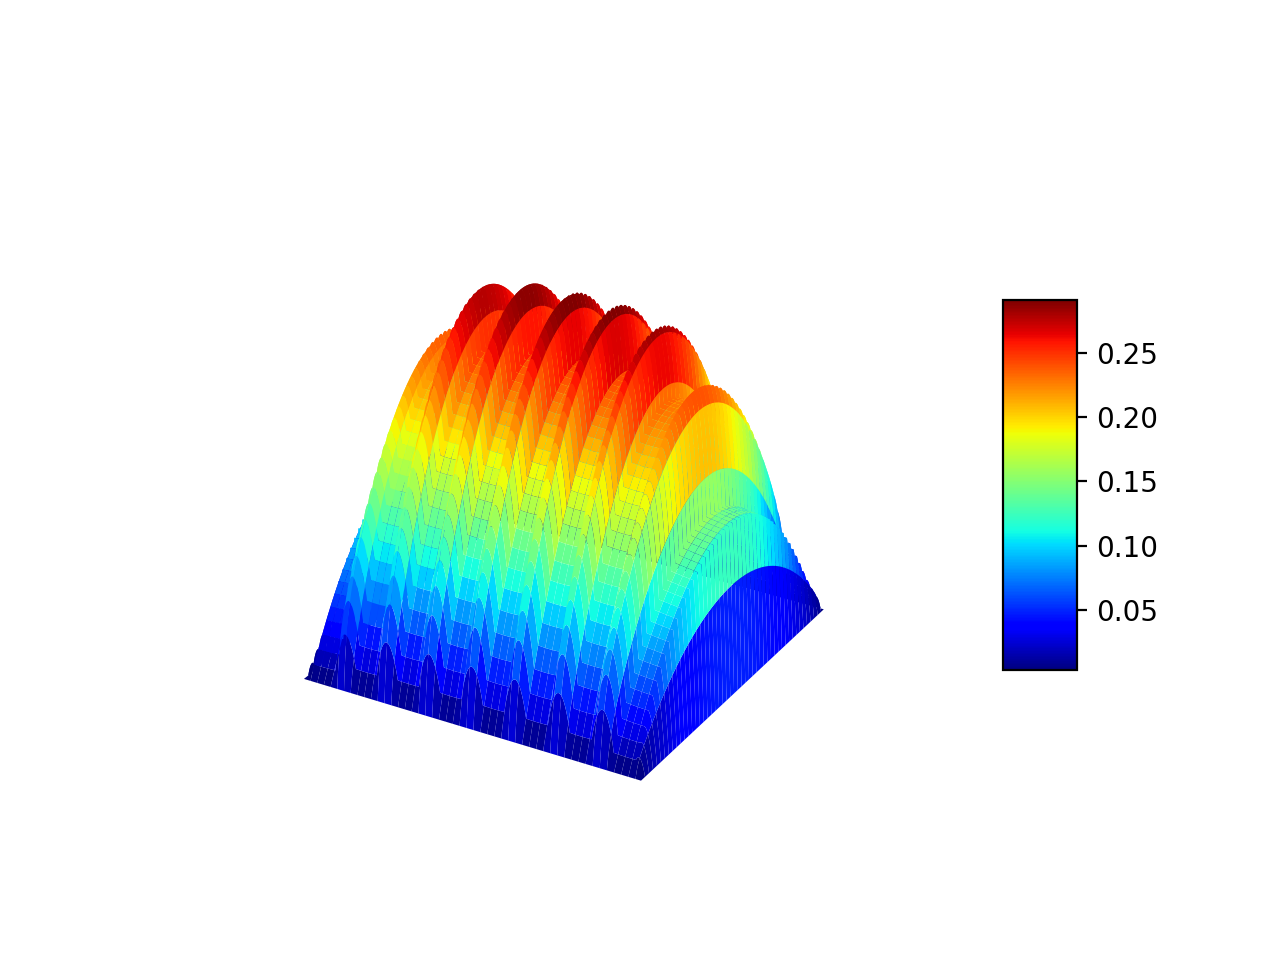

<IPython.core.display.Javascript object>


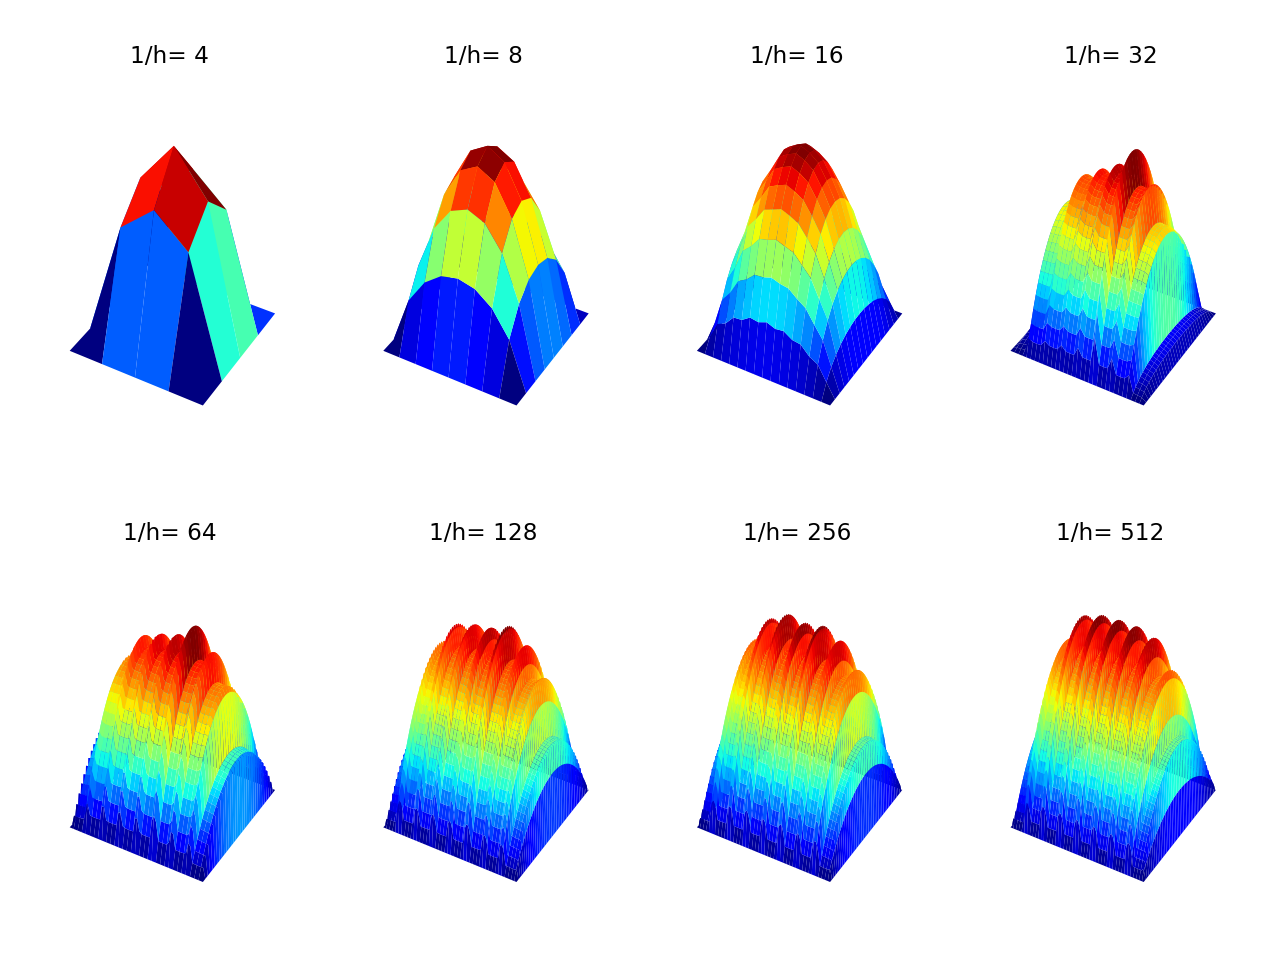

In [3]:
newErrorFine = []
x = []
y = []
for N in NList:
    NWorldCoarse = np.array([N,N])
    # print "Compute for N = "+ str(N) + " ..."
    NCoarseElement = NWorldFine/NWorldCoarse
    world = World(NWorldCoarse, NCoarseElement, boundaryConditions)
    AFine = fem.assemblePatchMatrix(NWorldFine, world.ALocFine, ABase)
    #grid nodes
    xpCoarse = util.pCoordinates(NWorldCoarse).flatten()
    NpCoarse = np.prod(NWorldCoarse+1)
    f = np.ones(NpCoarse)
    uCoarseFull = femsolverCoarse.solveCoarse_fem(world, ABase, f, boundaryConditions)
    basis = fem.assembleProlongationMatrix(NWorldCoarse, NCoarseElement)
    uLodCoarse = basis*uCoarseFull

    if N == fine:
        uSol = uCoarseFull
    else:
        newErrorFine.append(np.sqrt(np.dot(uSol - uLodCoarse, AFine*(uSol - uLodCoarse))))
        x.append(N)
        y.append(1./N)

    ymin = np.min(uSol)
    ymax = np.max(uSol)

    if np.size(x)==2:
        fig = plt.figure('FEM-Solution')
        fig.subplots_adjust(left=0.01,bottom=0.04,right=0.99,top=0.95,wspace=0,hspace=0.2)
        ax = fig.add_subplot(241, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==3:
        ax = fig.add_subplot(242, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==4:
        ax = fig.add_subplot(243, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==5:
        ax = fig.add_subplot(244, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==6:
        ax = fig.add_subplot(245, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==7:
        ax = fig.add_subplot(246, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==8:
        ax = fig.add_subplot(247, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")
    elif np.size(x)==9:
        ax = fig.add_subplot(248, projection='3d')
        ax.set_title('1/h= ' + str(N),fontsize="small")

    if N == fine:
        d3sol(NWorldCoarse, uCoarseFull)
    elif N == 2:
        init = 0
    else:
        d3solextra(NWorldCoarse, uCoarseFull, fig, ax, ymin, ymax)

plt.show()

<IPython.core.display.Javascript object>


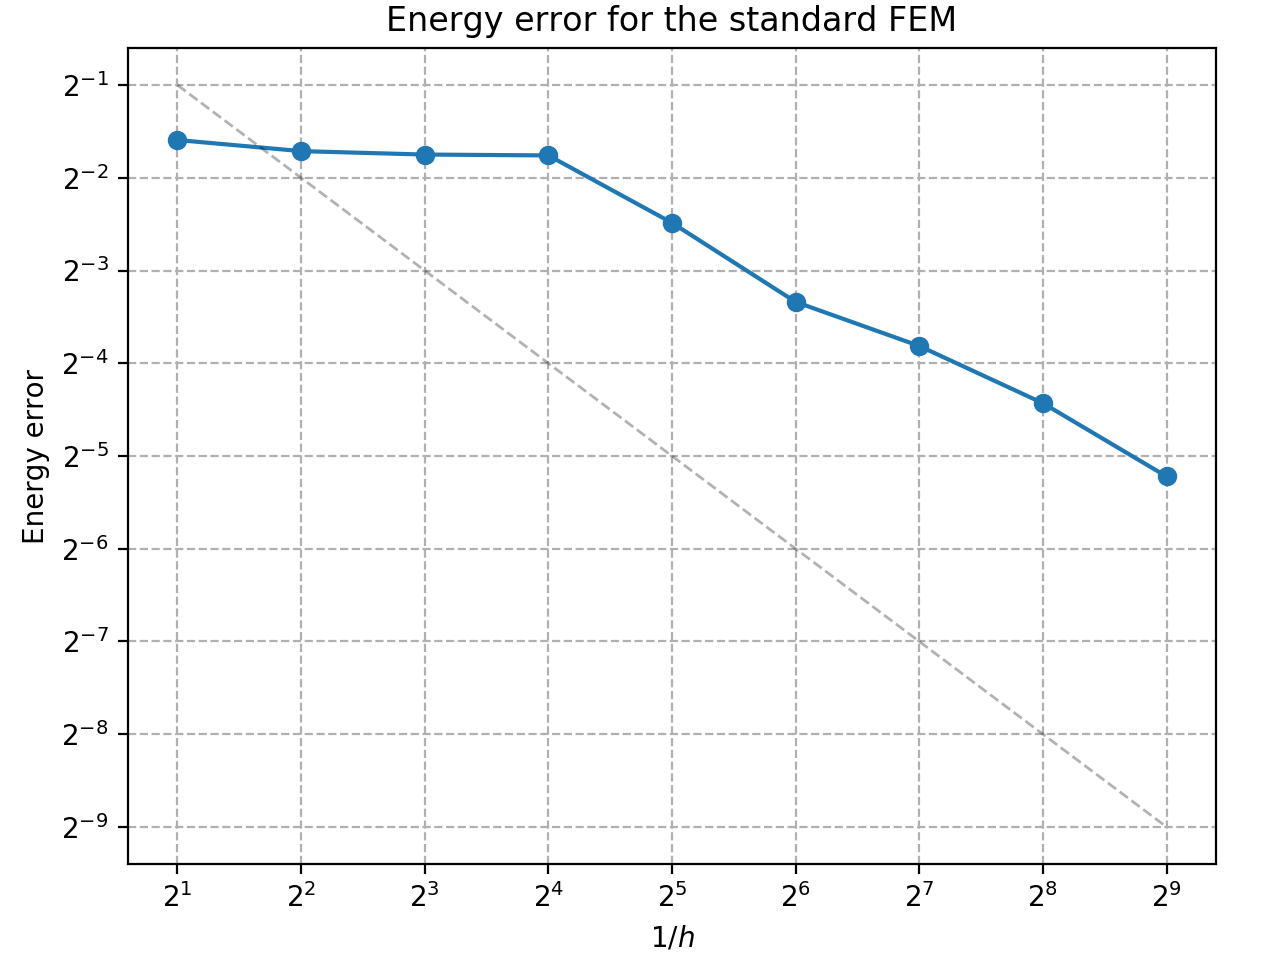

In [4]:
plt.figure("Error")
plt.loglog(x,newErrorFine,'o-', basex=2, basey=2)
plt.loglog(x,y,'--k',basex=2, basey=2, linewidth=1, alpha=0.3)
plt.ylabel('Energy error')
plt.xlabel('$1/h$')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.95,top=0.95,wspace=0.2,hspace=0.2)
plt.title('Energy error for the standard FEM')
plt.grid(True,which="both",ls="--")

plt.show()